## A Logistic Regression Multi-Class classifier using the 470-feature data set.

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix, accuracy_score
from sklearn import preprocessing

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('CSV/feature_vectors_470.csv', index_col=False)

In [41]:
len(df.index)

11598

In [42]:
features = df.iloc[0:11598,0:469].values
y = df['Class'].values

In [43]:
features_train, features_test, y_train, y_test = train_test_split(features,y,test_size=0.2,random_state=42)

In [44]:
scaler = preprocessing.StandardScaler().fit(features_train)

In [45]:
features_scaled = scaler.transform(features_train)

In [46]:
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(features_scaled, y_train)

KNeighborsClassifier()

In [47]:
cross_val_score(clf, features_scaled, y_train, cv=5, scoring="accuracy", verbose=True)

array([0.87176724, 0.8674569 , 0.87607759, 0.88140162, 0.8690027 ])

In [48]:
y_train_pred = cross_val_predict(clf, features_scaled, y_train, cv=5)

In [49]:
confusion_matrix(y_train, y_train_pred)

array([[ 812,   53,   38,   41,   47],
       [  64, 1462,   65,   50,   35],
       [  11,   21, 3060,   24,    2],
       [ 112,   73,   46, 1769,   46],
       [ 157,   84,   90,  118,  998]])

In [50]:
test_scaler = preprocessing.StandardScaler().fit(features_test)

In [51]:
features_scaled = scaler.transform(features_test)

In [52]:
y_test_pred = cross_val_predict(clf, features_scaled, y_test, cv=3)

In [53]:
confusion_matrix(y_test, y_test_pred)

array([[186,  23,  25,  21,   7],
       [ 25, 313,  44,  36,   6],
       [  6,  16, 753,   9,   2],
       [ 39,  39,  26, 387,   9],
       [ 50,  28,  33,  45, 192]])

In [54]:
multilabel_confusion_matrix(y_test, y_test_pred)

array([[[1938,  120],
        [  76,  186]],

       [[1790,  106],
        [ 111,  313]],

       [[1406,  128],
        [  33,  753]],

       [[1709,  111],
        [ 113,  387]],

       [[1948,   24],
        [ 156,  192]]])

In [55]:
confusion_matrix(y_test, y_test_pred, normalize='all')

array([[0.08017241, 0.00991379, 0.01077586, 0.00905172, 0.00301724],
       [0.01077586, 0.13491379, 0.01896552, 0.01551724, 0.00258621],
       [0.00258621, 0.00689655, 0.32456897, 0.00387931, 0.00086207],
       [0.01681034, 0.01681034, 0.0112069 , 0.16681034, 0.00387931],
       [0.02155172, 0.01206897, 0.01422414, 0.01939655, 0.08275862]])

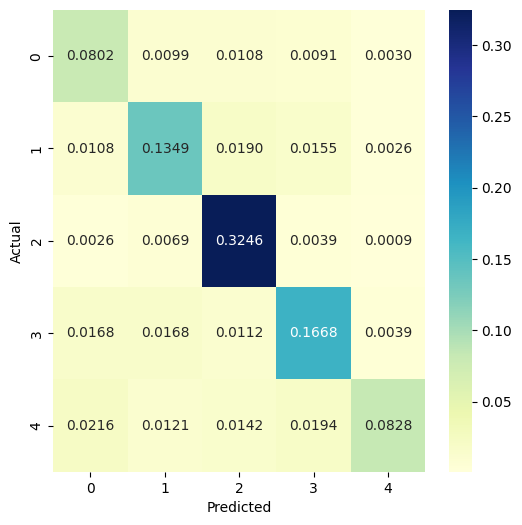

In [56]:
cm = confusion_matrix(y_test, y_test_pred, normalize='all')
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='.4f', cmap="YlGnBu")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

In [57]:
accuracy_score (y_test, y_test_pred)

0.7892241379310345

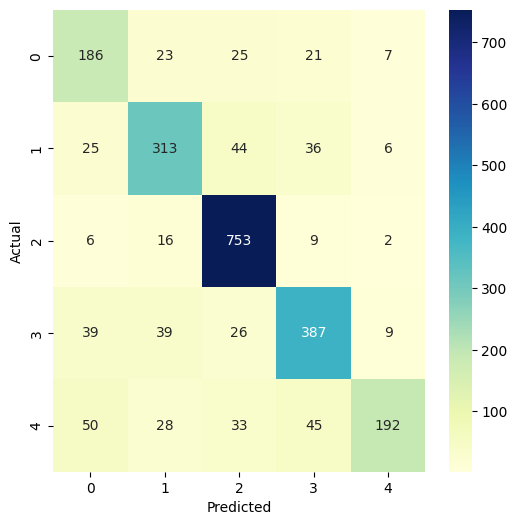

In [58]:
cm = confusion_matrix(y_test, y_test_pred)
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', cmap="YlGnBu")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)